<a href="https://colab.research.google.com/github/yiboxu20/MachineLearning/blob/main/homework/HW3/Fall25HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3
## Homework guideline
- The deadline is Nov 7th 11am. Submission after the deadline will not be graded.

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_Xu_Yibo.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point. If your code runs for **too long (over 10 minutes per question)**, points may be deducted.

- Please justify all short answers with a brief explanation. If you use latex command in the markdown, **1 points** bonus will be awarded.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to.

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources but work on your own!

**Collaboration:** List the names of all people you collaborated with and for which question(s). This is important!


In [1]:
%pylab inline
import numpy.linalg as LA
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


<br>



# Q1: Numpy practice problem (10pt)
---

### Q1.1 Replace values between 30 and 50 in the array $Z$ by value 0

In [ ]:
Z = np.random.randint(20,60,size=10)
# insert your code here




---


### Q1.2 Compute the one-hot encodings (dummy binary variables for each unique value in the array).
i.e., one-hot encoding for 2 in 4 dimension is $[0 ,1 , 0 ,0 ]$.


In [ ]:
Z = np.random.randint(1,4, size=6)
# insert yout code here


---
---

# Q2: Kernel trick (10pt)

 The power of kernel methods stems from the observation that data which are not linearly separable in their input feature space may in fact be separable in a higher-dimensional space, which is a function of the input features. For example, the data shown in class are not linearly separable in the feature space $(x_1, x_2)$, but they are separable in the transformed space where we transform each point $\vec{\mathbf{x}} = (x_1, x_2)$ according to $\Phi (\vec{\mathbf{x}}) = (x_1^2, x_2^2 \sqrt{2}x_1 x_2)$. Further, we can observe that for two data points $\vec{\mathbf{x}}$ and $\vec{\mathbf{y}}$, we have that

\begin{equation}
  \Phi(\vec{\mathbf{x}}) \cdot \Phi(\vec{\mathbf{y}}) = x_1^2 y_1^2 + x_2^2 y_2^2 + 2 x_1 y_1 x_2 y_2 = (\vec{\mathbf{x}} \cdot \vec{\mathbf{y}}) ^2 \triangleq \mathcal{K}(\vec{\mathbf{x}}, \vec{\mathbf{y}}),
\end{equation}
where $\mathcal{K}$ is a **kernel function**.

In this problem, we will generalize the situation shown in class.

<img src="https://github.com/yiboxu20/MachineLearning/blob/main/Resources/images/map_to_high_d.png?raw=true" width="600" />





---


### Q2.1 (a) 5pt
Consider data as above, but now separated by a circular decision boundary of arbitrary center and radius. Such a decision boundary can be expressed as $(x_1 - a)^2 + (x_2- b)^2 - r^2 = 0$. Show that a linear decision boundary can always be found if the data are projected in the four-dimensional feature space $(x_1,x_2, x_1^2, x_2^2)$.





## **Your Answer**:



---


### Q2.2 (b)  5pt
For data separated by an ellipse of the form $c(x_1- a)^2 + d(x_2 - b)^2 - 1 = 0$, show that a linear decision boundary can be found if the data are projected into the five-dimensional feature space $(x_1, x_2, x_1^2, x_2^2, x_1x_2)$.

## **Your Answer**:

---
---

# Q3: $k$-NN on Iris data (30pt)


This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a $150\times4$ matrices.

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.




In [ ]:
# you are not allowed to use other package and modules
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

# Split in training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, stratify=y)

print(X_train.shape)
print(X_test.shape)

(60, 4)
(90, 4)


---
### Q3.1 Use 5-fold cross validation to find optimal $k$ (20pt)
Here we only use the training dataset, `X_train` and `y_train`. We will test $k$ range from 1 to 21. For each $k$, we will use 5-fold cross validation to estimate the average misclassification rate. Please plot the average misclassification rate verse $k$ and find the optimal $k$.

In [ ]:
#@title Q3.1 your code starts here


---
### Q3.2 Use optimal $k$ to predict in the test dataset (10pt)
Now we have the optimal $k$. We will apply the optimal $k$-NN on the test dataset and please estimate the misclassification rate in the test dataset.

In [ ]:
#@title Q3.2 your code starts here


<br>

---
---


# Q4: K-means clustering (30pt)

In K-means, we are given dataset $\{\mathbf{x}^{(1)}, \dots,\mathbf{x}^{(N)} \}\subset \mathbb{R}^d$ and the number of clusters $K$, and we are trying to optimize the distortion value
$$J = \sum_{i=1}^N\sum_{j=1}^K r_{ij}\|\mathbf{x}^{(i)}-\mu_j\|_2^2$$
where $r_{ij}\in \{0,1\}$ is an indicator variable
$r_{ij}=1 \text{ if and only if } \mathbf{x}^{(i)}\in \mathcal{C}_{j}$. For each $i$, there is one and only one $j$ such that $r_{ij}=1$, i.e., the membership for $\mathbf{x}^{(i)}$ is unique.

##  Alternative optimization Steps

### Q4.1(a) 2.5pt
Fix $\{\mu_j\}$ and minimize over $\{r_{ij}\}$, **show** the solution for $r_{ij}$ is

$$r_{ij} = \begin{cases} 1 & \text{if } j= \text{arg}\min_k \|\mathbf{x}^{(i)}-\mu_k\|_2^2 \\ 0 & \text{Otherwise}\end{cases}$$
Please show your derivation.

## **Your Answer**:



---



### Q4.1 (b) 2.5pt
Fix $\{r_{ij}\}$ and minimize over $\{\mu_j\}$, **show** the solution for $\mu_j$ is  
$$\mu_j=\frac{\sum_i r_{ij}\mathbf{x}^{(i)}}{\sum_i r_{ij}}$$

Please show your derivation.


## **Your Answer**:

<br>

---
### K-means clustering can be applied to image compression. Let's explore this with the following image example.

(600, 394, 4)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


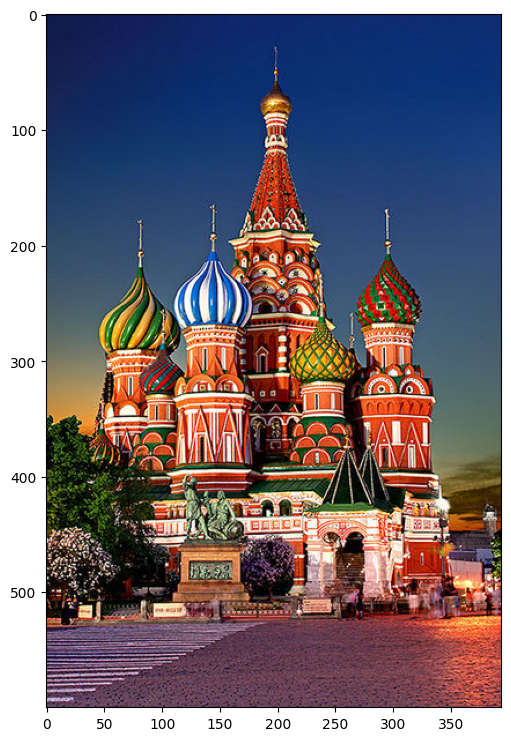

In [5]:
import urllib.request
from PIL import Image

img = np.array(Image.open(urllib.request.urlopen('https://github.com/yiboxu20/MachineLearning/blob/main/homework/HW3/1-Saint-Basils-Cathedral.png?raw=true')))
figure(figsize=(6,9))
imshow(img)
print(img.shape)

print(img[:,:,3])



---


### Q4.2 Prepare data (5pt)
The `img` has the dimension of $600\times 394\times 4$, please reshape it to the matrix with the size of $236400\times 3$. Note the last column `img[:,:,3]` should be ignored since they are all 255's. Then the number of features is 3 (which is RGB value) and number of samples of 236400.

In [ ]:
#@title Q4.2 your code starts here




---


###  Q4.3 Image compression with K-means (20pt)
Use $K=4, 8, 16$ to perform K-means algorithm and replace each row of the matrix `X` RGB value by its closest centroid RGB value. You need to reshape these three matrices back to the images with dimension $600\times 394\times 3$. Please use `imshow` to compare with these images. Please comment your results

In [ ]:
#@title Q4.3  your code starts here


## **Your Answer:**



---


###  Q4.4 Compression rate (Optional)
What are the compression rates for these three images? Please find a way to estimate them.

## **Your Answer:**

<br>

---
---
# Q5: K-means on MNIST (20pt)
The objective function in  K-means to minimize is
$$ \min_{\mu\in\mathbb{R}^{d\times K}}\sum_{j=1}^K \sum_{\mathbf{x}^{(i)}\in \mathcal{C}_j}\|\mathbf{x}^{(i)}-\mu_j\|^2$$

The Lloyd’s algorithm, the commonly-used heuristic which we discussed in lecture, typically works well to minimize this objective function.

In [6]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
Xtr                   = train_X[0:6000, :]
train_y_part          = train_y[0:6000]
Xte                   = test_X[0:1000,:]
test_y_part           = test_y[0:1000]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Q5.1 Implement (10pt)
Run the Lloyd's algorithm on the above 6k training dataset of MNIST with $K = 10$, plotting the objective function as a function of the iteration number.  Visualize (and include in your report) the cluster centers as a $28 \times 28$ image.

In [ ]:
#@title  Q5.1  your code starts here


## **Your Answer**:



---


### Q5.2 Use test set to find optimal $K$ (10pt)
For $K = \{2, 4, 8, 16, 32\}$, run the  Lloyd's  algorithm on the training dataset to obtain centers $\{\mu_j\}_{j=1}^K$. If $\{\mathbf{x}^{(i)}, y^{(i)}\}_{i=1}^{6000}$ and $\{\mathbf{x}'^{(j)}, y'^{(j)}\}_{j=1}^{1000}$ denote the training and test sets, respectively, plot the training error and test error (defined below) as a function of $K$ on the same
plot.
\begin{align}
&\text{Training Error: } \frac{1}{6000}\sum_{i=1}^{6000} \min_{k=1,\dots,K} \|\mu_k -\mathbf{x}^{(i)}\|_2^2\\
& \text{Testing Error: } \frac{1}{1000}\sum_{j=1}^{1000} \min_{k=1,\dots,K} \|\mu_k -\mathbf{x}'^{(j)}\|_2^2\\
\end{align}

In [ ]:
#@title  Q5.2  your code starts here


## **Your Answer**: